# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Data Overview

- Observations
- Sanity checks

In [ ]:
#mouting drive unit
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#loading data into a dataframe
visa = pd.read_csv('/content/drive/MyDrive/Study/MDS_UTexas/5_EnsembleTechniques/EasyVisa_Project/EasyVisa.csv')
visa_bk=visa.copy()

### Displaying the first and last 5 rows of the dataset

In [ ]:
visa.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
visa.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset.

In [ ]:
visa.shape

(25480, 12)

* There are 25,480 observations and 12 columns in the dataset

### Check the data types of the columns for the dataset.

In [ ]:
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
print(visa.continent.value_counts(),"\n\n")
print(visa.education_of_employee.value_counts(),"\n\n")
print(visa.has_job_experience.value_counts(),"\n\n")
print(visa.requires_job_training.value_counts(),"\n\n")
print(visa.region_of_employment.value_counts(),"\n\n")
print(visa.unit_of_wage.value_counts(),"\n\n")
print(visa.full_time_position.value_counts(),"\n\n")
print(visa.case_status.value_counts(),"\n\n")

Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64 


Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64 


Y    14802
N    10678
Name: has_job_experience, dtype: int64 


N    22525
Y     2955
Name: requires_job_training, dtype: int64 


Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64 


Year     22962
Hour      2157
Week       272
Month       89
Name: unit_of_wage, dtype: int64 


Y    22773
N     2707
Name: full_time_position, dtype: int64 


Certified    17018
Denied        8462
Name: case_status, dtype: int64 




**Observations-**
* 9 colums out of 12 are string
* Only 3 of the columns are numeric
* We can observe that there are no missing values in the dataset

### Summary of the dataset.

In [ ]:
visa.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations-**
* The minimum number of employees seems to be negative which doesn't make sense. Negative number might need to be treated for no_of_employees field. 75% of the cases seems to  have values <= than 3504.
* There might be outliers in no_of_employees data since there is a big difference in the 3rd quartile and maximum values, nonetheless the mas value 602K might be realistic since there are huge companies around the world with number of employess in millions scale.
* prevailing_wage field seems to have data anomalies since the minimum value is about 2 USD which doesn't make sense. This field needs to be verified to get a better view and try to improve the quality of the data. Analysis needs to be done broken down by units_of_wage

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 
> **Yes. We can see in the below 100% stacked bar chart that the highest the education the highest the proportion of certified cases**

2. How does the visa status vary across different continents? 
> **We can observe that most of the applications are done by Asia with a 66% contribution, Then Europe, North America, South America, Africa and Oceania with a 15%, 13%, 3%, 2% and 1% respectively**

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
> **For people WITHOUT job experience 60% of them get certified, For the ones with job experience 81% of them get certified, in a few word we can say that there is about 21% extra chance of getting certified for experienced profesionals. NOTE: High School has been excluded from the analysis since is not consideres as profesionals in a strict sense**

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
> **The ones paid by Year with about 70% chance, followed by Week, Month and Day with 62.1%, 61.8% and 34.6% chances respectively**

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

> *   **The minimum value for both case_status is very close to 0.**
> *   **Q1 is 25K and 40K for Denied and Certified respectively**
> *   **Median values are close to 62K and 70K for Denied and Certified respectively**
> *   **Q3 values are close to 105K and 110K for Denied and Certified respectively**
> *   **Max values are close to 230K and 215K  for Denied and Certified respectively**

**That variation can be observed in the relevant boxplots in question 5 section below!**












  
  

 
**Finding answer for Questions**:

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**

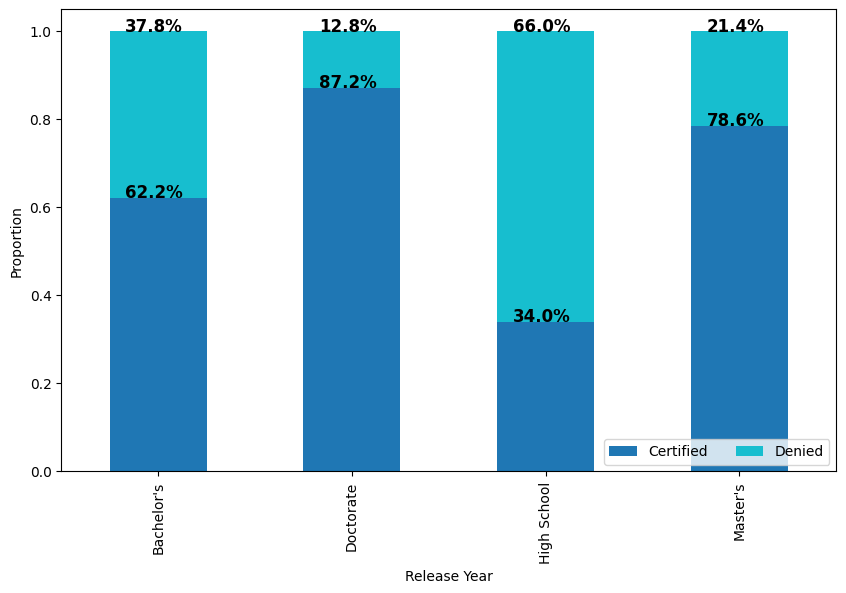

In [ ]:
#creating a 100% stacked charts to get proportions of certified and non certified cases by education of employees.
#creating crostab with counts for education and case status
cross_tab = pd.crosstab(index=visa['education_of_employee'],
                        columns=visa['case_status'])

#creating crostab with proportions for education and case status
cross_tab_prop = pd.crosstab(index=visa['education_of_employee'],
                             columns=visa['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**2. How does the visa status vary across different continents?**

In [ ]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

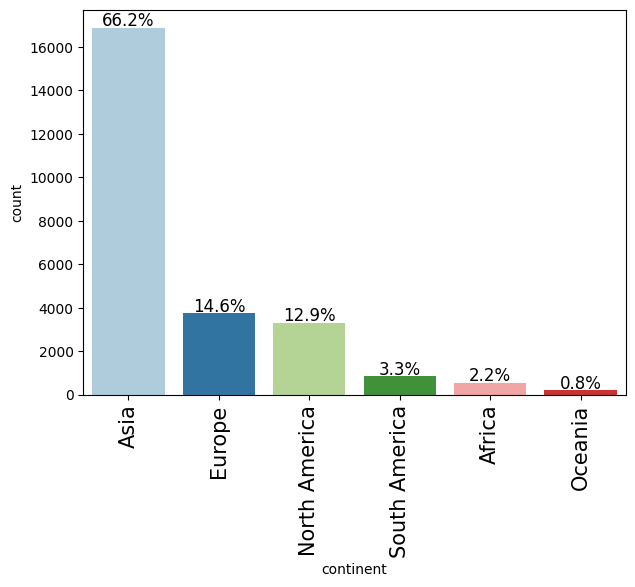

In [ ]:
labeled_barplot(visa,"continent",perc=True)

**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

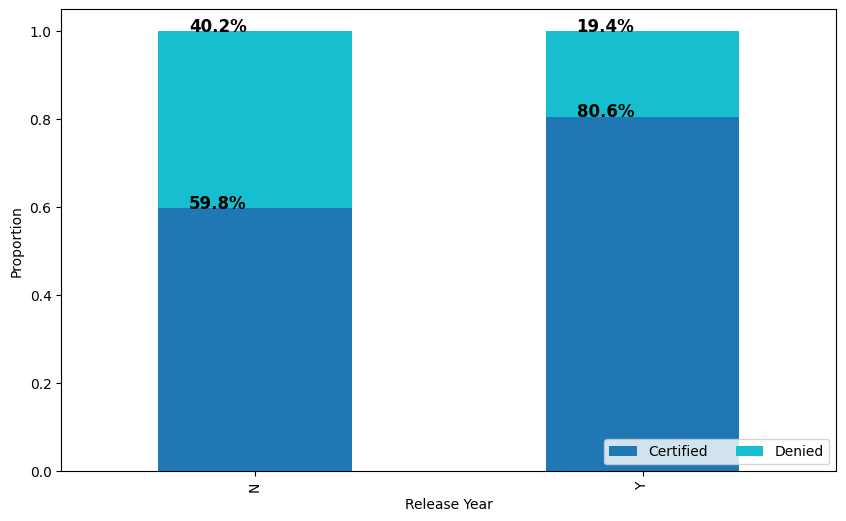

In [ ]:
#creating a 100% stacked charts to get proportions of certified and non certified cases by job_experience of employees.

#getting list only of observations of profesionals (Bachelor degree and above)
visa_profesionals=visa[visa['education_of_employee']!='High School']

#creating crostab with counts for has_job_experience and case status
cross_tab = pd.crosstab(index=visa_profesionals['has_job_experience'],
                        columns=visa_profesionals['case_status'])

#creating crostab with proportions for has_job_experience and case status
cross_tab_prop = pd.crosstab(index=visa_profesionals['has_job_experience'],
                             columns=visa_profesionals['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**

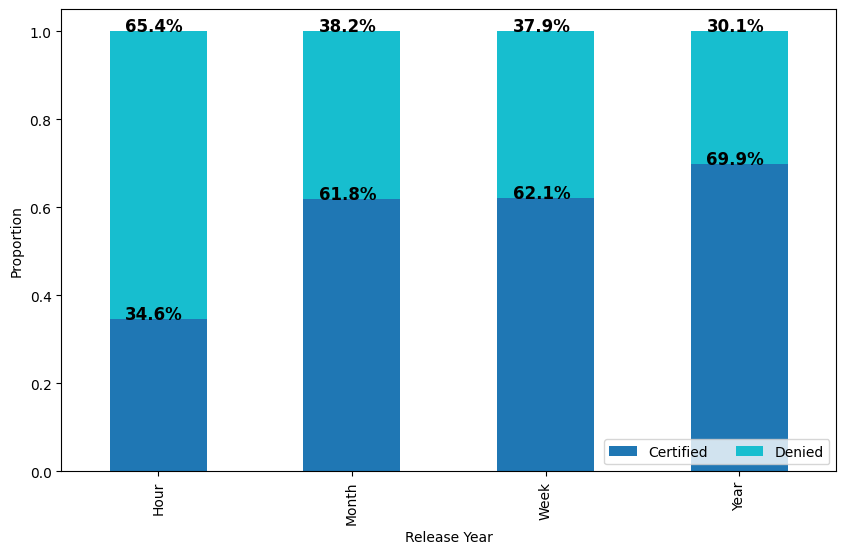

In [ ]:
#creating a 100% stacked charts to get proportions of certified and non certified cases by unit_of_wage.
#creating crostab with counts for unit_of_wage and case status
cross_tab = pd.crosstab(index=visa['unit_of_wage'],
                        columns=visa['case_status'])

#creating crostab with proportions for education and case status
cross_tab_prop = pd.crosstab(index=visa['unit_of_wage'],
                             columns=visa['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("Release Year")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**

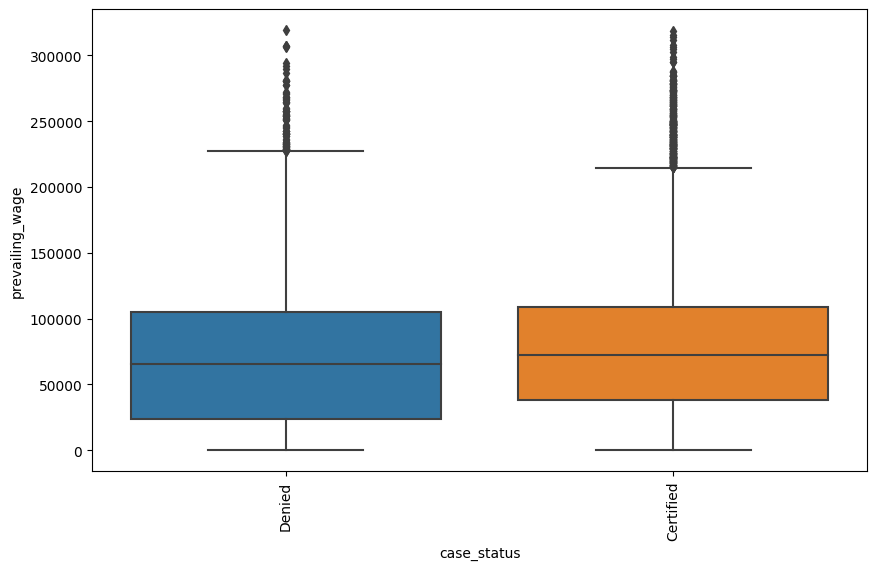

In [ ]:
#creating boxplot for certified and non certified categories with range of prevailing wage for each one
plt.figure(figsize=(10,6))
sns.boxplot(data=visa,x='case_status', y='prevailing_wage')
plt.xticks(rotation=90);
plt.show();

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

####Duplicate value check

In [ ]:
#removing case_id to compare if duplicates are found for the rest of the columns
visa_dup_check = visa_bk.drop('case_id', axis=1)
dup_count=visa_dup_check[visa_dup_check.duplicated()]["case_status"].count()
print("There are ",dup_count," duplicate observations")

There are  0  duplicate observations


####Missing value treatment
** No need of missing value treatment! As per verifications in the Data Overview section there are no missing values for object/string columns nor for numeric columns.

####Feature engineering

In [ ]:
#replacing categorical ordinal features with its respective codes, also no/yes fields with 0 and 1 respectively
replaceStruct = {
                "education_of_employee": {"High School": 1, "Bachelor's": 2, "Master's": 3, "Doctorate": 4},
                "has_job_experience":     {"N": 0, "Y": 1 },
                "requires_job_training":  {"N": 0, "Y": 1 },
                "unit_of_wage":{"Hour": 1, "Week": 2, "Month": 3, "Year": 4},
                "full_time_position":    {"N": 0, "Y": 1 },
                "case_status":           {"Denied": 0, "Certified": 1 }
                }

#getting dummy variables for the nominal cases
oneHotCols=["continent","region_of_employment"]

In [ ]:
#asigning values to ordinal and binary variables and getting dummy fields ready
visa=visa.replace(replaceStruct)
visa=pd.get_dummies(visa, columns=oneHotCols)
visa.head(10)

,case_id,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,prevailing_wage,unit_of_wage,full_time_position,case_status,...,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Island,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West
0,EZYV01,1,0,0,14513,2007,592.2029,1,1,0,...,1,0,0,0,0,0,0,0,0,1
1,EZYV02,3,1,0,2412,2002,83425.6500,4,1,1,...,1,0,0,0,0,0,0,1,0,0
2,EZYV03,2,0,1,44444,2008,122996.8600,4,1,0,...,1,0,0,0,0,0,0,0,0,1
3,EZYV04,2,0,0,98,1897,83434.0300,4,1,0,...,1,0,0,0,0,0,0,0,0,1
4,EZYV05,3,1,0,1082,2005,149907.3900,4,1,1,...,0,0,0,0,0,0,0,0,1,0
5,EZYV06,3,1,0,2339,2012,78252.1400,4,1,1,...,1,0,0,0,0,0,0,0,1,0
6,EZYV07,2,0,0,4985,1994,53635.3900,4,1,1,...,1,0,0,0,0,0,0,0,1,0
7,EZYV08,2,1,0,3035,1924,418.2298,1,1,0,...,0,0,1,0,0,0,0,0,0,1
8,EZYV09,2,0,0,4810,2012,74362.1900,4,1,1,...,1,0,0,0,0,0,1,0,0,0
9,EZYV10,4,1,0,2251,1995,67514.7600,4,1,1,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
#double checking columns type
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   case_id                         25480 non-null  object 
 1   education_of_employee           25480 non-null  int64  
 2   has_job_experience              25480 non-null  int64  
 3   requires_job_training           25480 non-null  int64  
 4   no_of_employees                 25480 non-null  int64  
 5   yr_of_estab                     25480 non-null  int64  
 6   prevailing_wage                 25480 non-null  float64
 7   unit_of_wage                    25480 non-null  int64  
 8   full_time_position              25480 non-null  int64  
 9   case_status                     25480 non-null  int64  
 10  continent_Africa                25480 non-null  uint8  
 11  continent_Asia                  25480 non-null  uint8  
 12  continent_Europe                

**Observations:**
*   We can observe that all columns now are numeric type after performing all feature enginering modifications.
*   Categorical ordinal features with its respective codes, also no/yes fields with 0 and 1 have been treated.
*   One-hot encoding  has been performed for the relevant fields.

####Outlier detection and treatment

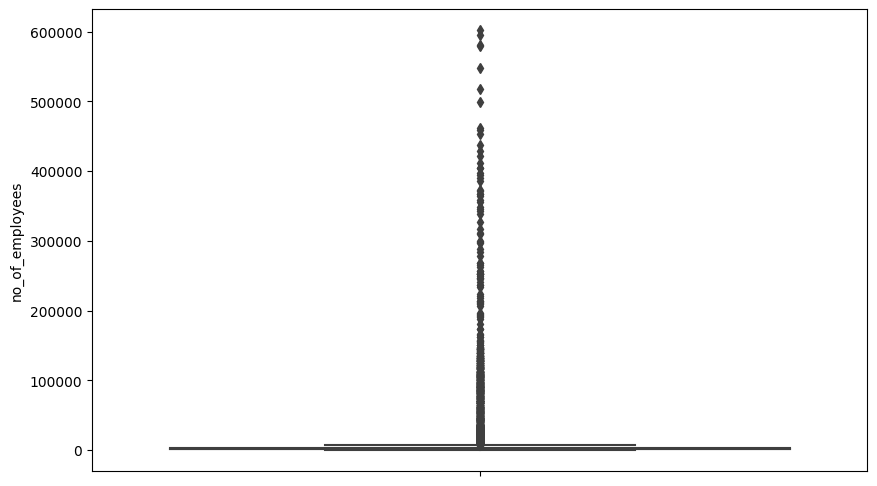

In [ ]:
#creating boxplot for no_of_employees
plt.figure(figsize=(10,6))
sns.boxplot(data=visa,y='no_of_employees')
plt.xticks(rotation=90);
plt.show();

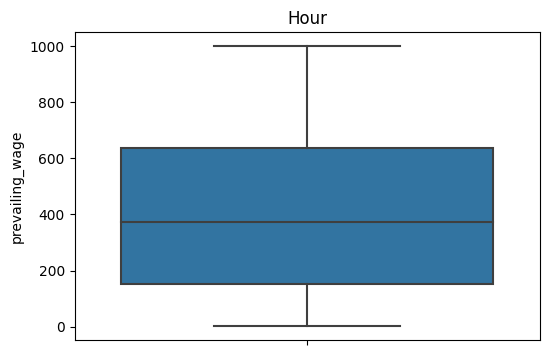

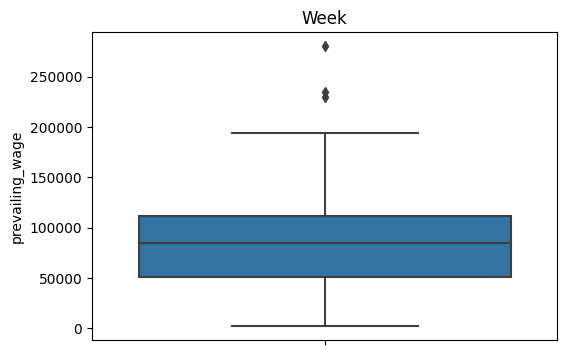

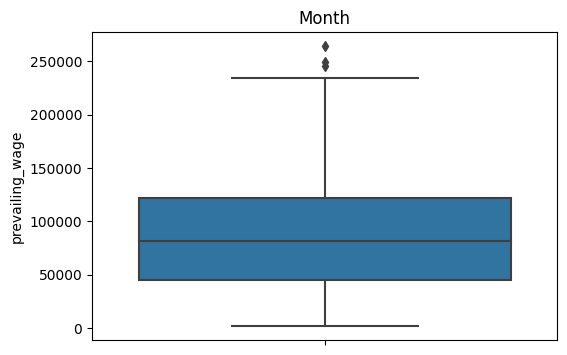

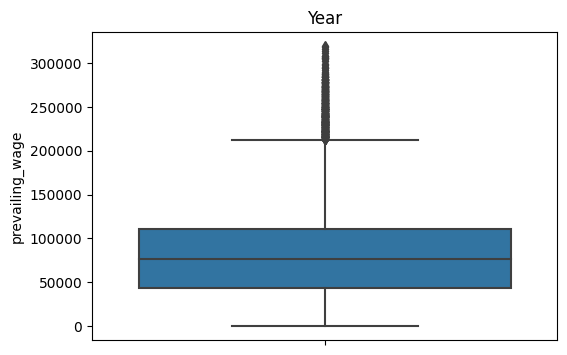

In [ ]:
#creating boxplot for prevailing_wage by unit_of_wage
plt.figure(figsize=(6,4))
sns.boxplot(data=visa,y=visa_bk[visa_bk["unit_of_wage"]=="Hour"]["prevailing_wage"])
plt.xticks(rotation=90);
plt.title("Hour")
plt.show();

print("\n\n")
#creating boxplot for certified and non certified categories with range of prevailing wage for each one
plt.figure(figsize=(6,4))
sns.boxplot(data=visa,y=visa_bk[visa_bk["unit_of_wage"]=="Week"]["prevailing_wage"])
plt.xticks(rotation=90);
plt.title("Week")
plt.show();

print("\n\n")
#creating boxplot for certified and non certified categories with range of prevailing wage for each one
plt.figure(figsize=(6,4))
sns.boxplot(data=visa,y=visa_bk[visa_bk["unit_of_wage"]=="Month"]["prevailing_wage"])
plt.xticks(rotation=90);
plt.title("Month")
plt.show();

print("\n\n")
#creating boxplot for certified and non certified categories with range of prevailing wage for each one
plt.figure(figsize=(6,4))
sns.boxplot(data=visa,y=visa_bk[visa_bk["unit_of_wage"]=="Year"]["prevailing_wage"])
plt.xticks(rotation=90);
plt.title("Year")
plt.show();

In [ ]:
# to find the 25th percentile and 75th percentile for the numerical columns.
df_numeric = ['prevailing_wage',	'no_of_employees']

Q1 = visa[df_numeric].quantile(0.25)
Q3 = visa[df_numeric].quantile(0.75)

IQR = Q3 - Q1                   #Inter Quantile Range (75th percentile - 25th percentile)

lower_whisker = Q1 - 1.5*IQR    #Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper_whisker = Q3 + 1.5*IQR

In [ ]:
((visa[df_numeric] < lower_whisker) | (visa[df_numeric] > upper_whisker)).sum()/visa.shape[0]*100

prevailing_wage    1.675824
no_of_employees    6.106750
dtype: float64

In [ ]:
#Updating negative values for no_of_employees using the average of such field
visa.loc[visa["no_of_employees"] <= 0, "no_of_employees"] = int(visa["no_of_employees"].mean())

**Observations:**
*   No outliers for hourly prevailing wage. Nonetheless a few values look very low, nonetheless they are not imposible values. So Will leave them like that.
*   For Weekly prevailing wage, there are some outliers at the upper whisker, nonetheless they don't look imposible when comparing with the upper whisker.
*   For monthly prevailing wage, there are also some outliers at the upper whisker, however they also don't look imposible values compared to the upper whisker despite the differences is significant
*   For yearly prevailing wage there are outliers but also they are very possible values for a year of work. **a few very low values** have been found for yearly wage, however they are a very few records for such reason they won't be treated.

**So for the sake of this analysis outlies will not be treated for prevailing_wage feature**

*   **no_of_employees** shows a lot of outliers, however the number of employees of the companies are possible values. There are companies in the order up to million of employees around the world, so it wouldn't be imposible to have companies with those high  numbers, for such reason outliers will not be treated for no_of_employees feature.
*   **no_of_employees** anomalies/negative values will be treated since does not make sense to have a negative number of employees.












####Preparing data for modeling 

In [ ]:
visa.info()
print("\n")
#Booking_ID column will be delete for simulation purposes
visa=visa.drop("case_id", axis=1)
print("\n")
visa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   case_id                         25480 non-null  object 
 1   education_of_employee           25480 non-null  int64  
 2   has_job_experience              25480 non-null  int64  
 3   requires_job_training           25480 non-null  int64  
 4   no_of_employees                 25480 non-null  int64  
 5   yr_of_estab                     25480 non-null  int64  
 6   prevailing_wage                 25480 non-null  float64
 7   unit_of_wage                    25480 non-null  int64  
 8   full_time_position              25480 non-null  int64  
 9   case_status                     25480 non-null  int64  
 10  continent_Africa                25480 non-null  uint8  
 11  continent_Asia                  25480 non-null  uint8  
 12  continent_Europe                

In [ ]:
X = visa.drop('case_status', axis=1)
y = visa.pop('case_status')

In [ ]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(17836, 19) (7644, 19)


In [ ]:
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [ ]:
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

####Any other preprocessing steps

**No further steps needed for data preparation!**

## EDA

- It is a good idea to explore the data once again after manipulating it.

### Univariate analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

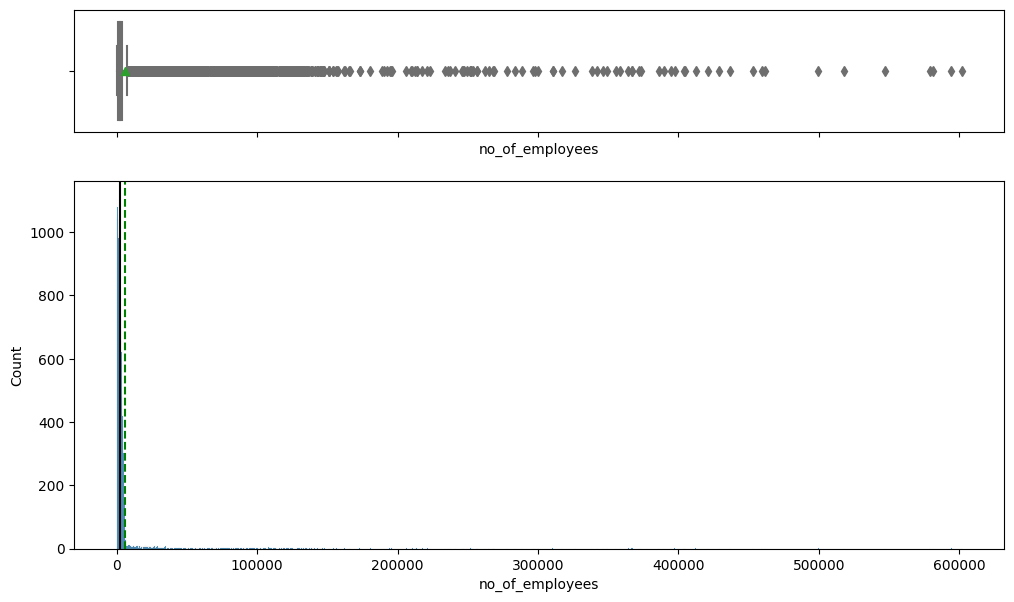

In [ ]:
#checking variable no_of_employees
histogram_boxplot(visa,'no_of_employees')

**Observations**
There are several outliers present in the data, nonetheless the number of employees that high might be real values as per research. There are companies with number of employees on escale of millions.

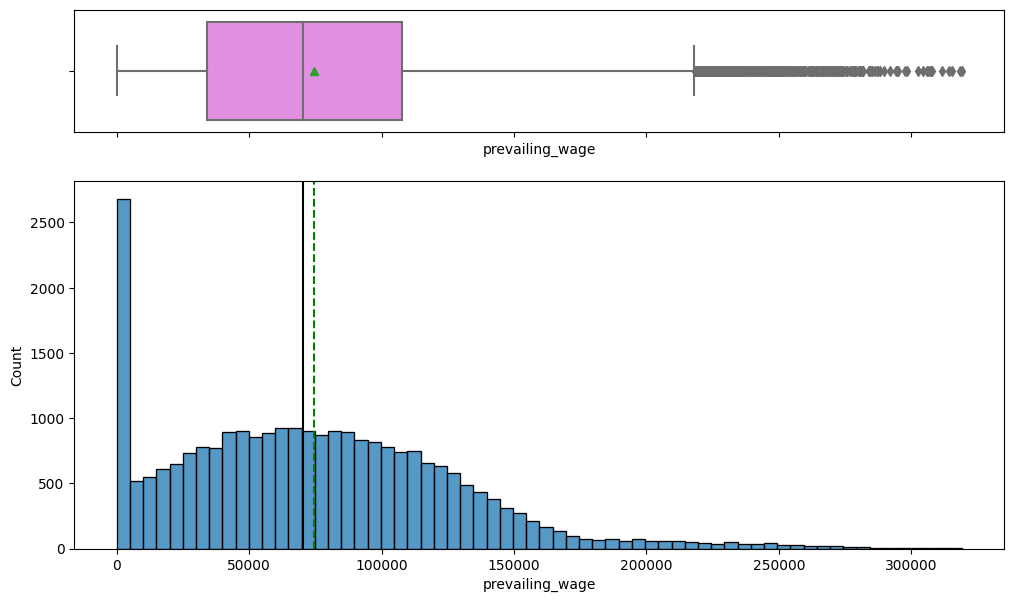

In [ ]:
#checking variable prevailing_wage
histogram_boxplot(visa,'prevailing_wage')

**Observations**
Data distribution is right skewed with a mean somewhere between 60K - 70K.

There are plenty outliers at the right whisker, however they might real values as per previous verifications.

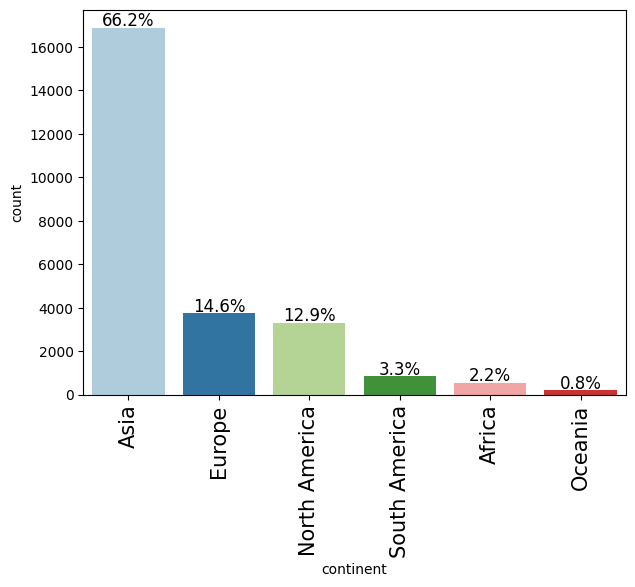

In [ ]:
#checking continent distribution
labeled_barplot(visa_bk,"continent",perc=True)

**Observations**
Most of the applications come from Asia with a 66% contrib, then we have Europe, North America, South America, Africa and Oceania with 15%, 13%, 3%, 2% and 1% respectively.

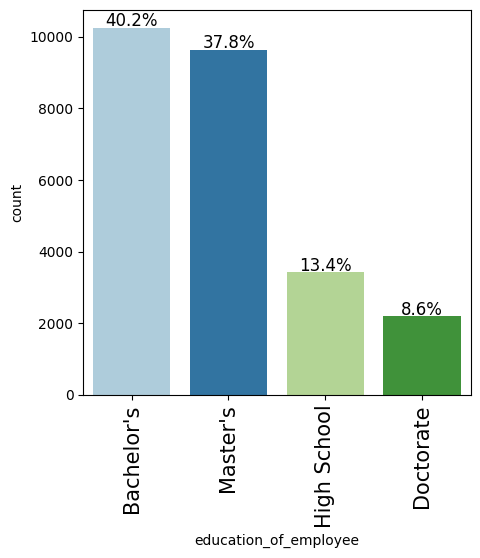

In [ ]:
#checking education_of_employee distribution
labeled_barplot(visa_bk,"education_of_employee",perc=True)

**Observations**
Most of the applications are either Bachelor's or Masters with 40% and 38% respectively, just this 2 categories together cover about 78% of all applications.
9% of applications for Doctorate cateogory. In total 87% of applications are performed by professionals.

Only 13% of applications for the non-professional segment High School

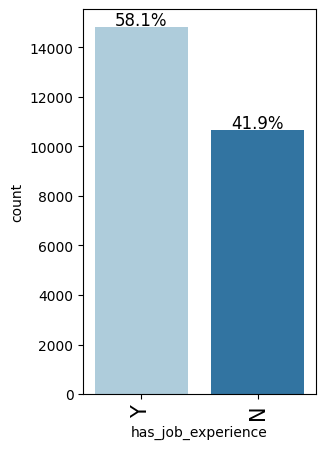

In [ ]:
#checking has_job_experience distribution
labeled_barplot(visa_bk,"has_job_experience",perc=True)

**Observations**
58% of the applicants have job experience; while about 42% don't have.

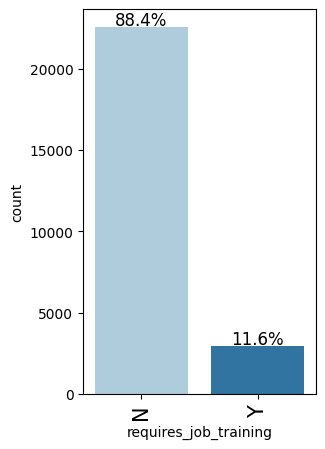

In [ ]:
#checking requires_job_training distribution
labeled_barplot(visa_bk,"requires_job_training",perc=True)

**Observations**
Only 12% of the applicants required job training, the rest 88% didn't require.

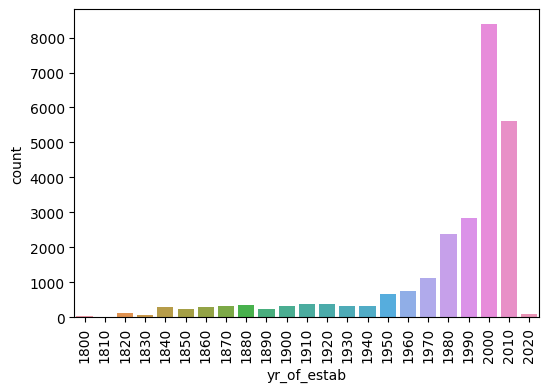

In [ ]:
#countplot boxplot for yr_of_estab by unit_of_wage
plt.figure(figsize=(6,4))
sns.countplot(data=visa_bk,x=(round(visa_bk["yr_of_estab"]/10)*10).astype(int))
plt.xticks(rotation=90);
plt.show();

**Observations**
Most of applications are linked to companies that habe been stablished between after year 1990.

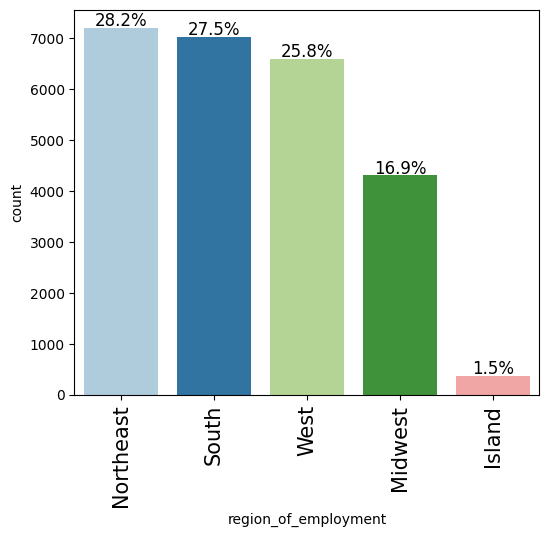

In [ ]:
#checking region_of_employment distribution
labeled_barplot(visa_bk,"region_of_employment",perc=True)

**Observations**
Northeast, South and West regions have a very amount of applications with 28%, 28% and 26% respectively; Midwest contributes with 17% and Island only 2%

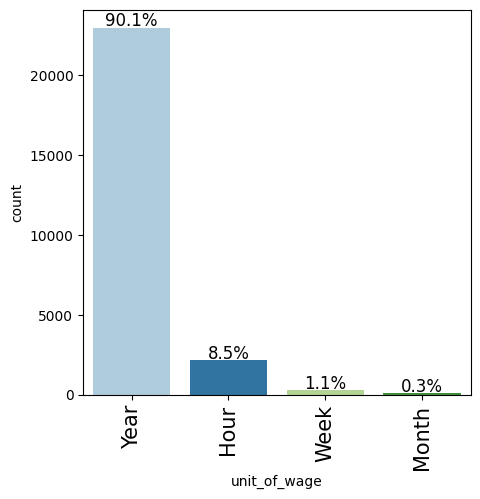

In [ ]:
#checking unit_of_wage distribution
labeled_barplot(visa_bk,"unit_of_wage",perc=True)

**Observations**
90% of the applications have a yearly wage unit; 9% have an hourly wage unit and only 1% and 0.3% have a weekly and monthly wage unit respectively.

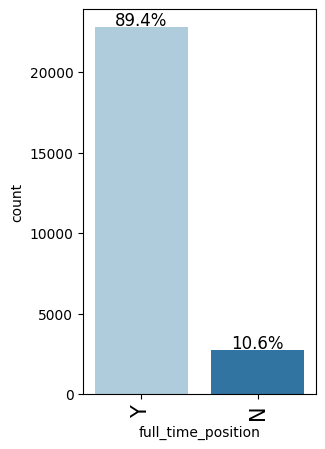

In [ ]:
#checking full_time_position distribution
labeled_barplot(visa_bk,"full_time_position",perc=True)

**Observations**
89% of the job applications offer a full time position, whereas only 11% offer a non-full time position.


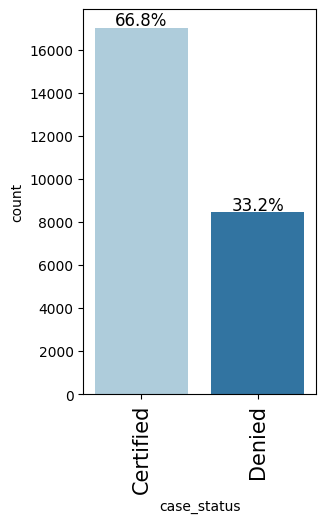

In [ ]:
#checking case_status distribution
labeled_barplot(visa_bk,"case_status",perc=True)

**Observations**
67% of the applications got certified; whereas 33% got Denied.

### Bivariate Analysis

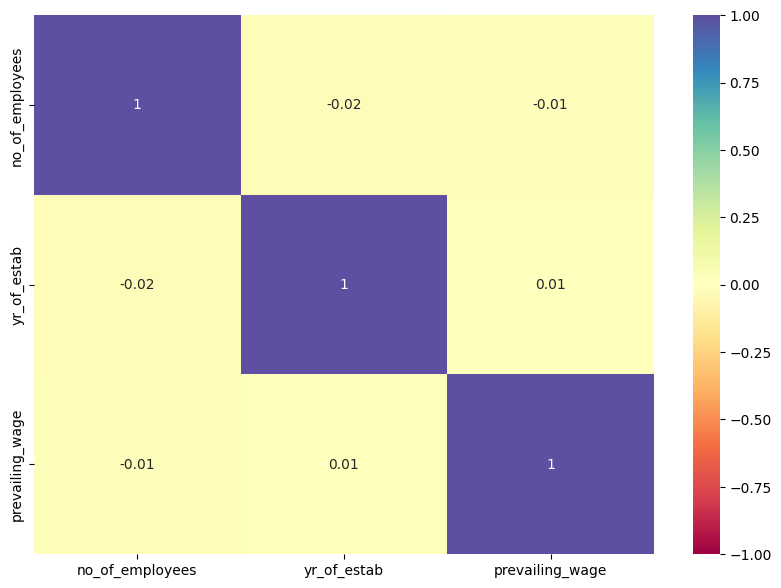

In [ ]:
#checking numerical variables
plt.figure(figsize=(10,7))
sns.heatmap(visa_bk.corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()

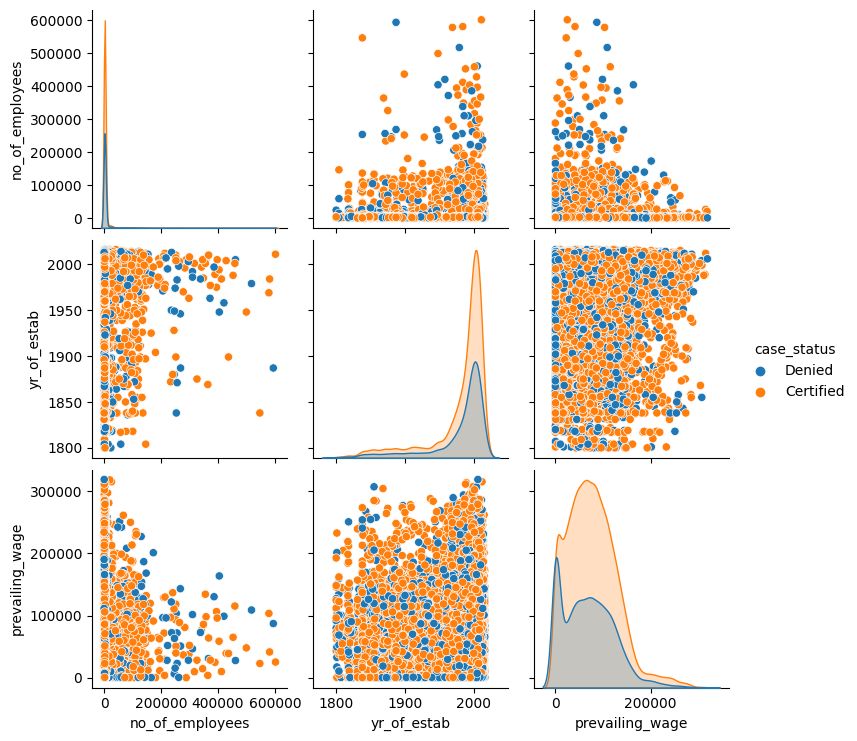

In [ ]:
sns.pairplot(visa_bk,hue='case_status')
plt.show()

**Observations**
We can observe that there is no evident correlation among the numerical variables.

####Checking relationship between continent and case_status

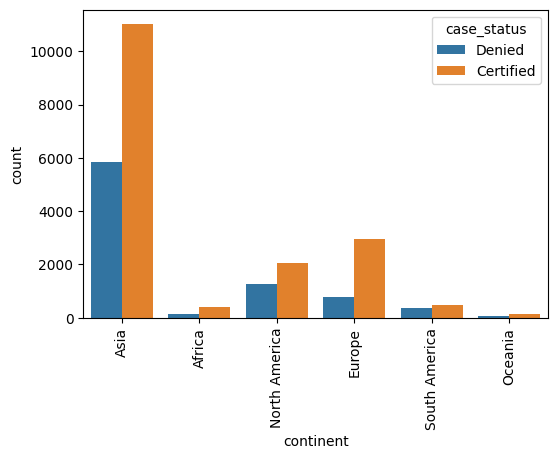

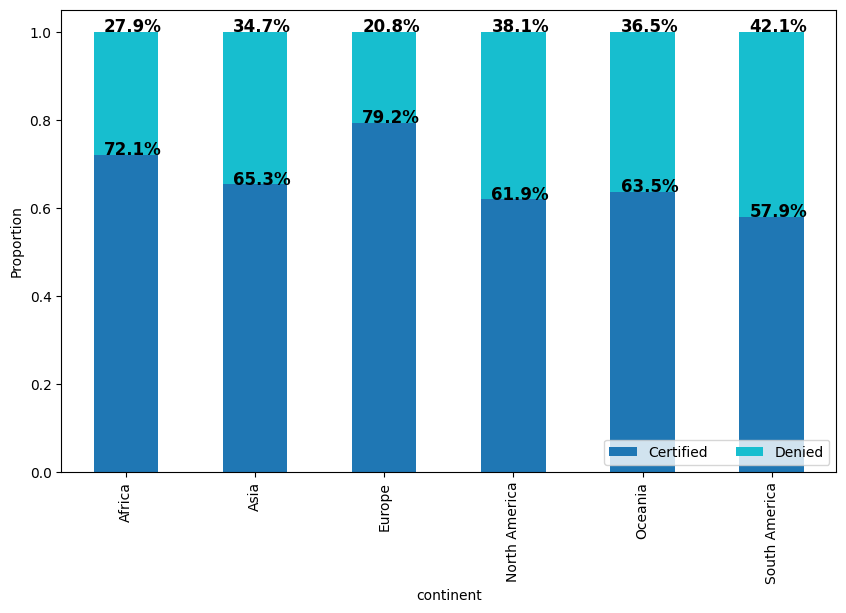

In [ ]:
print("\n\n")
#creating countplot by case status and continent
plt.figure(figsize=(6,4))
sns.countplot(data=visa_bk,x="continent", hue="case_status")
plt.xticks(rotation=90);
plt.show();

print("\n\n")
#creating a 100% stacked charts to get proportions case status by continent.
#creating crostab with counts for continent and case status
cross_tab = pd.crosstab(index=visa_bk['continent'],
                        columns=visa_bk['case_status'])

#creating crostab with proportions for continent and case status
cross_tab_prop = pd.crosstab(index=visa_bk['continent'],
                             columns=visa_bk['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("continent")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**Observations**

Asia is by far the continent with more applications. Africa and Europe are the continents with the highest percentage of certified aplications with 72% and 79% respectively. South America is the one with lower certified rate with 58%. This feature seems to have some significant influence in the final decision but further checks might be needed in order to confirm that.

####Checking relationship between education_of_employee and case_status

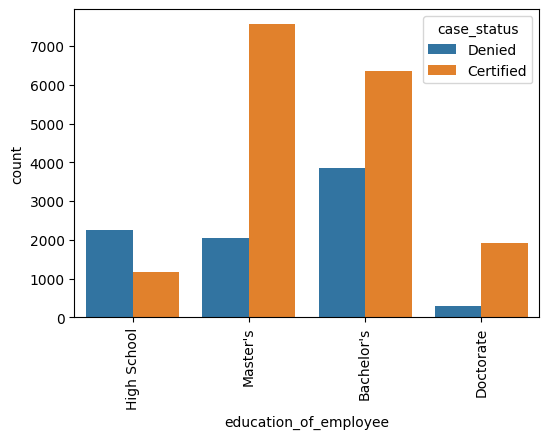

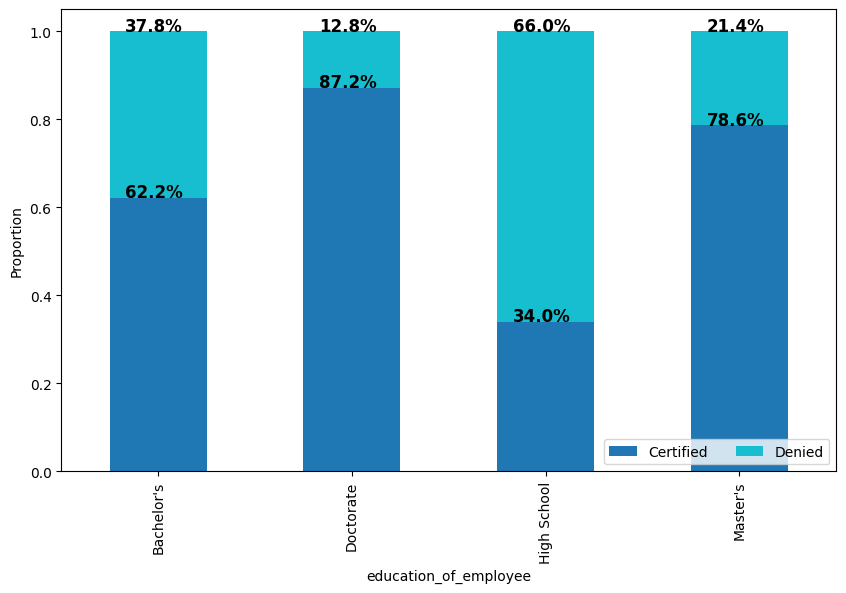

In [ ]:
print("\n\n")
#creating countplot by case status and education_of_employee
plt.figure(figsize=(6,4))
sns.countplot(data=visa_bk,x="education_of_employee", hue="case_status")
plt.xticks(rotation=90);
plt.show();

print("\n\n")
#creating a 100% stacked charts to get proportions case status by education_of_employee.
#creating crostab with counts for education_of_employee and case status
cross_tab = pd.crosstab(index=visa_bk['education_of_employee'],
                        columns=visa_bk['case_status'])

#creating crostab with proportions for education_of_employee and case status
cross_tab_prop = pd.crosstab(index=visa_bk['education_of_employee'],
                             columns=visa_bk['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel("education_of_employee")
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**Observations**

This feature seems to have a high influence in the Visa certification process; The higher the level of eduction, the higher chances of getting certified. Doctorate, Master's, Bachelors and High School have this certified rates respectively 87%, 79%, 62% and  34%. As we can observe; having for someone having only high school would be quite hard to get certified as the oposite for someone with a Doctorate

####Checking relationship between has_job_experience and case_status

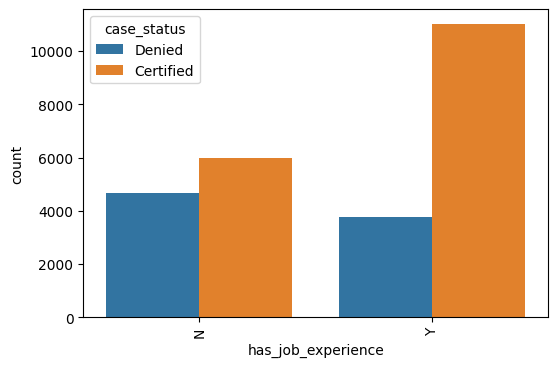

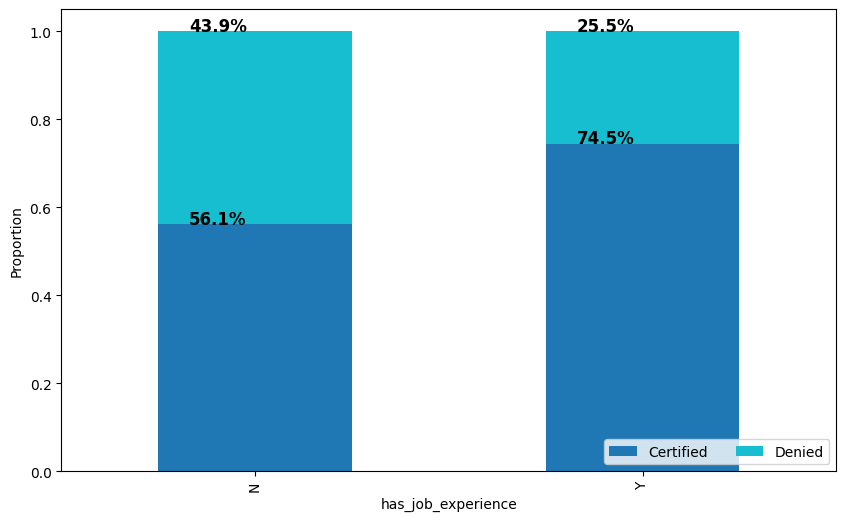

In [ ]:
print("\n\n")
var="has_job_experience"
#creating countplot by case status and has_job_experience
plt.figure(figsize=(6,4))
sns.countplot(data=visa_bk,x=var, hue="case_status")
plt.xticks(rotation=90);
plt.show();

print("\n\n")
#creating a 100% stacked charts to get proportions case status by has_job_experience.
#creating crostab with counts for has_job_experience and case status
cross_tab = pd.crosstab(index=visa_bk[var],
                        columns=visa_bk['case_status'])

#creating crostab with proportions for has_job_experience and case status
cross_tab_prop = pd.crosstab(index=visa_bk[var],
                             columns=visa_bk['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel(var)
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**Observations**

Most of the applications have been performed by people with job experience. To have experiences seems to favour the objective of get a Certified visa since applications where person has some job experience has a 75% rate of certified cases; while only 56% is the rate for people without job experience.

####Checking relationship between requires_job_training and case_status

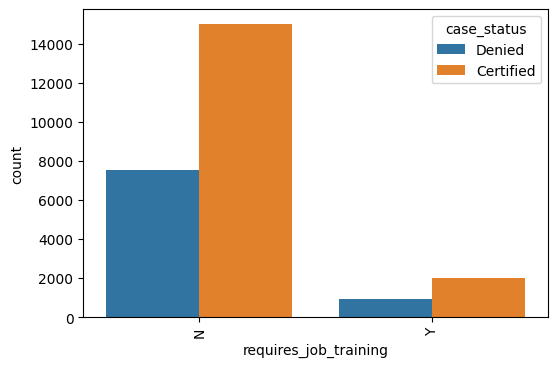

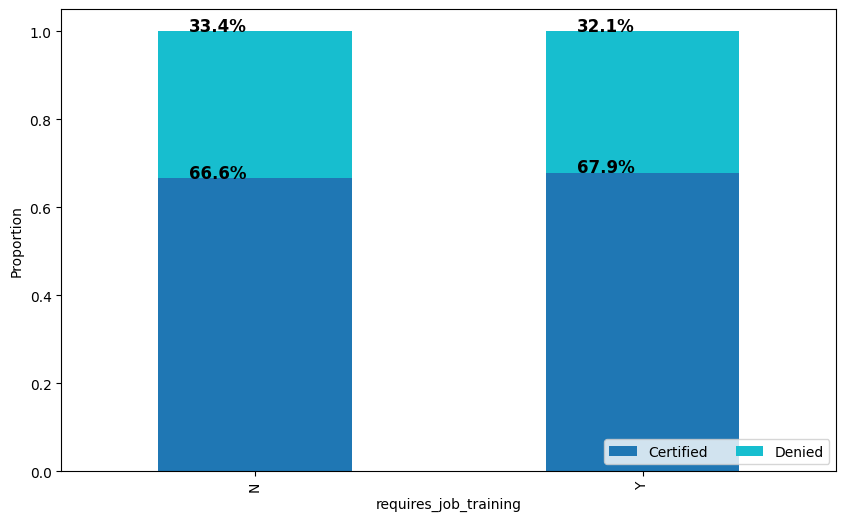

In [ ]:
print("\n\n")
var="requires_job_training"
#creating countplot by case status and requires_job_training
plt.figure(figsize=(6,4))
sns.countplot(data=visa_bk,x=var, hue="case_status")
plt.xticks(rotation=90);
plt.show();

print("\n\n")
#creating a 100% stacked charts to get proportions case status by requires_job_training.
#creating crostab with counts for requires_job_training and case status
cross_tab = pd.crosstab(index=visa_bk[var],
                        columns=visa_bk['case_status'])

#creating crostab with proportions for requires_job_training and case status
cross_tab_prop = pd.crosstab(index=visa_bk[var],
                             columns=visa_bk['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel(var)
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**Observations**

Applicants that don't require training are the most commong ones in the data set. The certified rate for this feature regardles the requires_job_trainig field value ranges from 67%-68%. This might indicate a lower influence on the final decision

####Checking relationship between region_of_employment and case_status

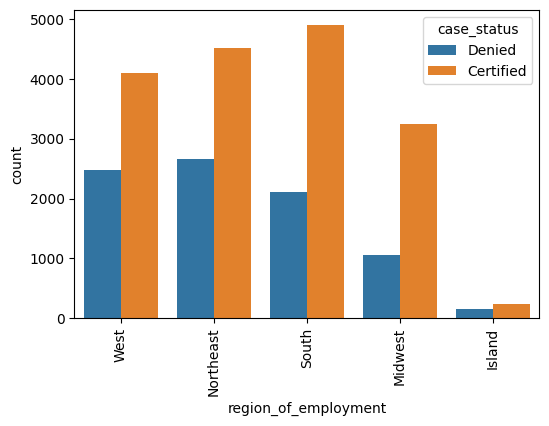

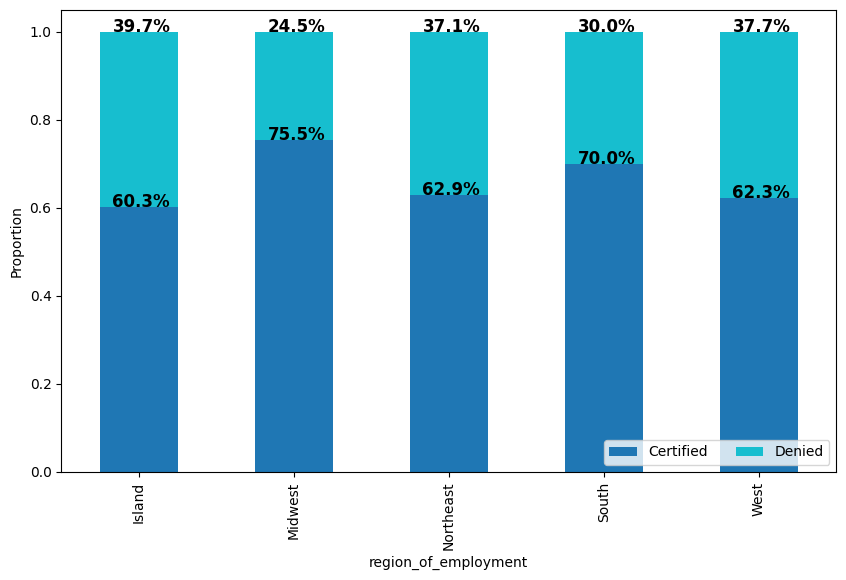

In [ ]:
print("\n\n")
var="region_of_employment"
#creating countplot by case status and region_of_employment
plt.figure(figsize=(6,4))
sns.countplot(data=visa_bk,x=var, hue="case_status")
plt.xticks(rotation=90);
plt.show();

print("\n\n")
#creating a 100% stacked charts to get proportions case status by region_of_employment.
#creating crostab with counts for region_of_employment and case status
cross_tab = pd.crosstab(index=visa_bk[var],
                        columns=visa_bk['case_status'])

#creating crostab with proportions for region_of_employment and case status
cross_tab_prop = pd.crosstab(index=visa_bk[var],
                             columns=visa_bk['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel(var)
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**Observations**

West, Northeast and South have a quite even amount of applications, whereas Mildwest have a smaller number of applications and Island has the smallest contribution.
Island, Northeast and West have a quite even Certified rate that ranges from 60% to 63%, whereas Mildwest and South have a more generous rate of 76% and 70% of certified applications respectively. So this feature seems to have a small influence in the final decision.  

####Checking relationship between unit_of_wage and case_status

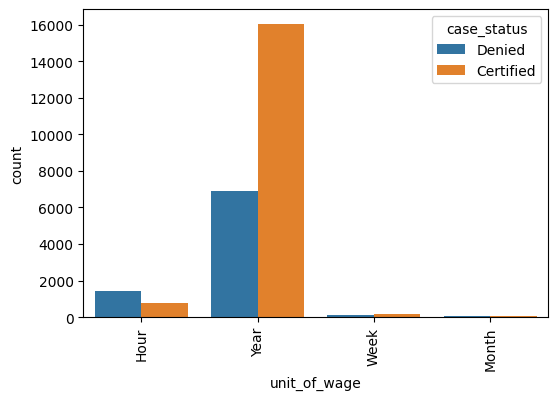

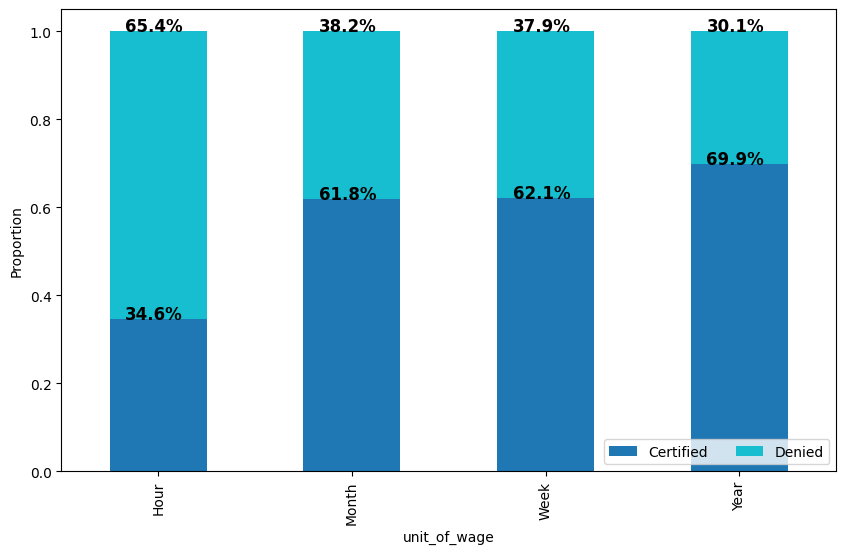

In [ ]:
print("\n\n")
var="unit_of_wage"
#creating countplot by case status and unit_of_wage
plt.figure(figsize=(6,4))
sns.countplot(data=visa_bk,x=var, hue="case_status")
plt.xticks(rotation=90);
plt.show();

print("\n\n")
#creating a 100% stacked charts to get proportions case status by unit_of_wage.
#creating crostab with counts for unit_of_wage and case status
cross_tab = pd.crosstab(index=visa_bk[var],
                        columns=visa_bk['case_status'])

#creating crostab with proportions for unit_of_wage and case status
cross_tab_prop = pd.crosstab(index=visa_bk[var],
                             columns=visa_bk['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel(var)
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**Observations**

Positions where unit_of_wage is Year are the more common in the dataset with about 90% of the observations. Weekly, Monthly and Yearly unit wages have a very even distribution ranging from 62% to 70%.
The applications where unit_of_wage is hour seems to have a very low certification rate of only 35%.
This feature seems to have some mild influence in the final decision for the certification.

####Checking relationship between full_time_position and case_status

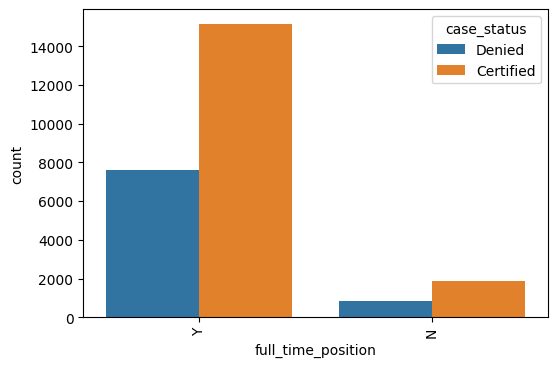

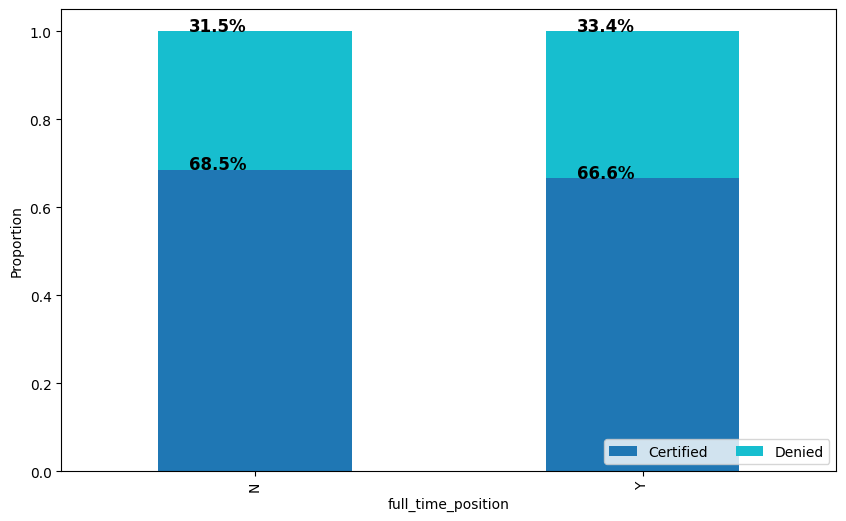

In [ ]:
print("\n\n")
var="full_time_position"
#creating countplot by case status and full_time_position
plt.figure(figsize=(6,4))
sns.countplot(data=visa_bk,x=var, hue="case_status")
plt.xticks(rotation=90);
plt.show();

print("\n\n")
#creating a 100% stacked charts to get proportions case status by full_time_position.
#creating crostab with counts for full_time_position and case status
cross_tab = pd.crosstab(index=visa_bk[var],
                        columns=visa_bk['case_status'])

#creating crostab with proportions for full_time_position and case status
cross_tab_prop = pd.crosstab(index=visa_bk[var],
                             columns=visa_bk['case_status'],
                             normalize="index")

#creating a 100% stacked bar char
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="lower right", ncol=2)
plt.xlabel(var)
plt.ylabel("Proportion")

for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, y_loc) in zip(cross_tab_prop.loc[x],
                                   cross_tab_prop.loc[x].cumsum()):
                
        plt.text(x=n - 0.17,
                 y=y_loc,
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

**Observations**

Most of the applications are for full time position jobs. At this stage it looks like full_time_position does not have much influence in the decision of being certified or not; the certified rates for full time and not-full time are 69% and 67% with tell us that the rate would be very close regarles the full_time_position feature

## Model evaluation criterion


**The model can make wrong predictions as:**
1. Predicting a Certified when it should be Denied.
2. Predicting a Denied when it should be Certified.

**Which case is more important? **
1. If the model predicts a Certified when it should be Denied; then the company would suffer some affection on its reputation, and also the chance of assigning that job to a more suitable person. It also affects the hiring company as they might get the wrong resource.
2. If the model predicts Denied when it should be Certified we affect applicants that are suitable for the jobs and also affect the hiring company by not getting those qualified applicants

**Which metric to optimize?**
* We would want F1-Score to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly.

**Let's define a function to provide metric scores on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree - Model Building

#### Decision Tree

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.656463  0.736729   0.745786  0.74123


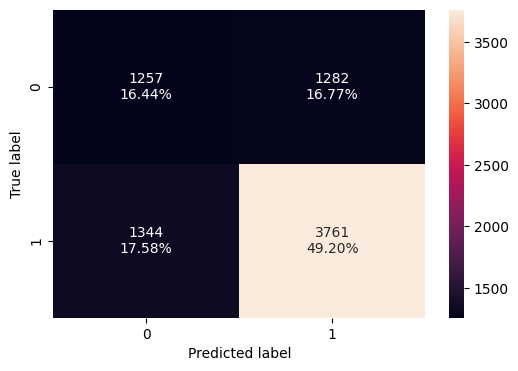

In [ ]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

* The decision tree is overfitting the training data.
* We will try hyperparameter tuning and check out if the model performance improves.

## Building bagging and boosting models

### Bagging - Model Building

#### Random Forest Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720696  0.836239   0.766703  0.799963


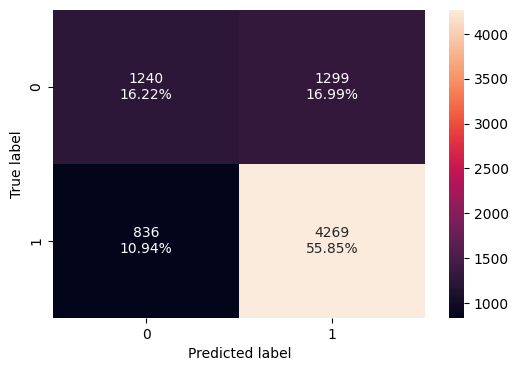

In [ ]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

* Random forest is giving a slightly higher test f1-score than decision trees but it is overfitting the training data.
* Will try hyperparameter tuning to see if the model performance improves.

#### Bagging Classifier

   Accuracy    Recall  Precision       F1
0  0.983516  0.984387   0.990875  0.98762
   Accuracy    Recall  Precision        F1
0  0.698718  0.771988   0.775787  0.773883


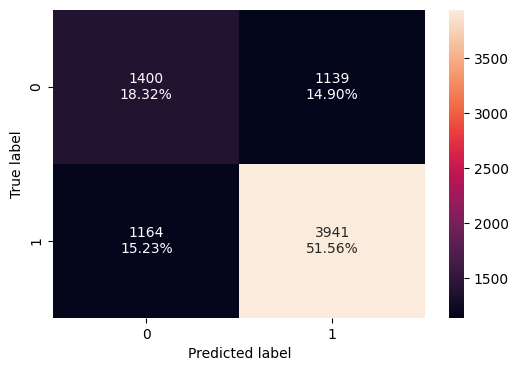

In [ ]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print(bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print(bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

* Bagging classifier is overfitting the training data, F1 Score is slightly lower than Random Forest and Decision tree.
* We will see if hyperparameter tuning improves the performance of the model.

### Boosting - Model Building

#### AdaBoost Classifier

   Accuracy    Recall  Precision        F1
0  0.737105  0.889449   0.758591  0.818825
   Accuracy    Recall  Precision        F1
0   0.73247  0.885406   0.755853  0.815516


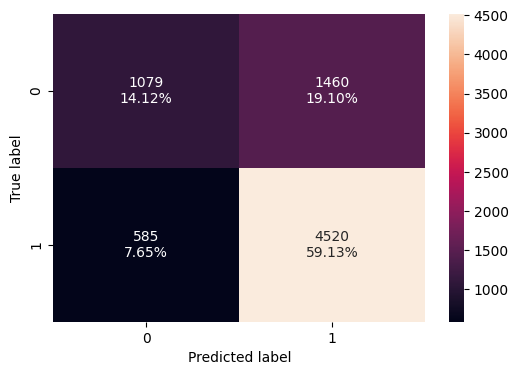

In [ ]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print(ab_classifier_model_train_perf)
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print(ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

* Adaboost is NOT overfitting the training data, however accuracy is still a bit low 0.73. The model generalizes well and has a slightly better performance than the previous models.
* Let's see how it goes after hyperparameter tuning

#### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.758298  0.883824   0.782476  0.830068
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746206  0.878159   0.772798  0.822116


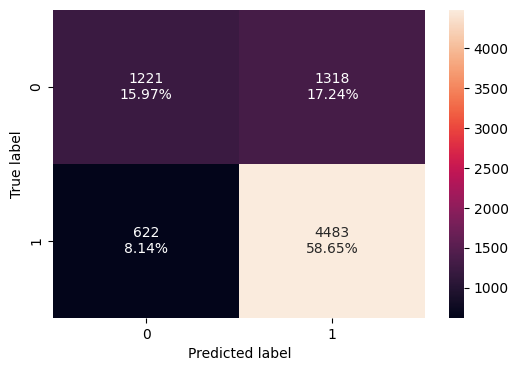

In [ ]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

* We can say that the gradient boosting classifier is NOT overfitting the training data.
* The model has an acceptable recall and precision.
* The model performances is good in terms of F1-score. We can also add up that is the best one so far where F1-Score is good and there is no overfitting.

#### XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0   0.82967  0.924284   0.837529  0.878771
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.73247  0.859158   0.767857  0.810946


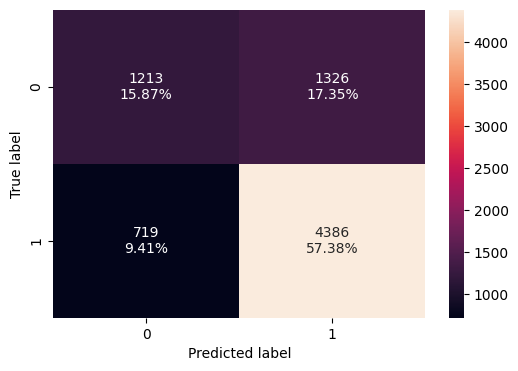

In [ ]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

* xgboost classifier is overfitting the training data.
* It shows an acceptable performance in terms of F1-score
* Let's see how it goes after hyperparameter tuning.

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
#grid_obj = grid_obj.fit(X_train, y_train)



# set the conditions for the random search
grid_obj = RandomizedSearchCV(xgb_tuned,
                 param_distributions=parameters,
                 n_iter=100,
                 cv=3,
                 scoring='f1_micro',
                 return_train_score=True,
                 random_state=42)

# perform the hyperparameter tuning with random search
grid_obj.fit(X_train, y_train)

# find the best hyperparameters
best_parameters = grid_obj.best_params_
best_score = grid_obj.best_score_

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
# perform the hyperparameter tuning with random search
xgb_tuned.fit(X_train, y_train)
y_pred_rs = xgb_tuned.predict(X_test)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.763904  0.884832   0.787818  0.833511
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745029  0.873849   0.773673  0.820716


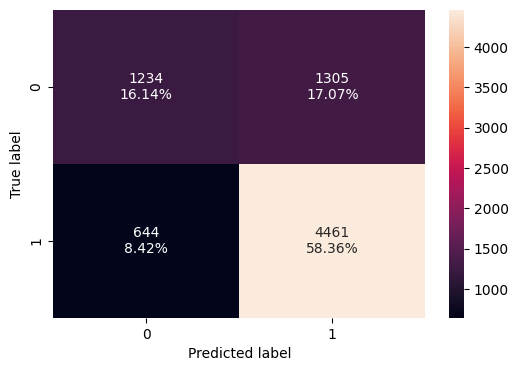

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The model now is not overfitting the training data.
* Recall shows a slight reduction, whereas precision has a slight increase.
* There is a small improvement of the performance of the model in terms of F1 score.

### Stacking Model

In [ ]:
estimators = [('Random Forest',rf_tuned), ('Gradient Boosting',gbc_tuned), ('Decision Tree',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=10,
                                                       max_features='log2',
                                                       min_samples_split=12,
                                                       n_estimators=90,
                                                       oob_score=True,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.8,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Decision Tree...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.1,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=30, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None, random_state=1, ...))

Training performance:
    Accuracy    Recall  Precision        F1
0  0.764129  0.880215   0.790442  0.832916
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.747645  0.870127   0.778206  0.821604


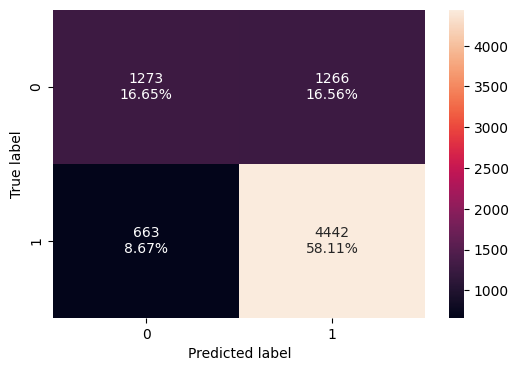

In [ ]:
#Calculating different metrics
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

* In general terms we couls say that the model is not overfitting training data since the difference of training accuracy and test accuracy is very low.
* The model has a decent performance in terms of recall, precision and F1-score.
* The stacking classifier show a very similar performance to XGBoost Tuned

##  Will tuning the hyperparameters improve the model performance?

### Decision Tree - Hyperparameter Tuning

In [ ]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.67,1:0.33},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
#grid_obj = grid_obj.fit(X_train, y_train)



# set the conditions for the random search
grid_obj = RandomizedSearchCV(dtree_estimator,
                 param_distributions=parameters,
                 n_iter=100,
                 cv=3,
                 scoring='f1_micro',
                 return_train_score=True,
                 random_state=42)

# perform the hyperparameter tuning with random search
grid_obj.fit(X_train, y_train)

# find the best hyperparameters
best_parameters = grid_obj.best_params_
best_score = grid_obj.best_score_

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
# perform the hyperparameter tuning with random search
dtree_estimator.fit(X_train, y_train)
y_pred_rs = dtree_estimator.predict(X_test)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.727181  0.766054   0.814458  0.789515
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.721481  0.767091   0.806425  0.786266


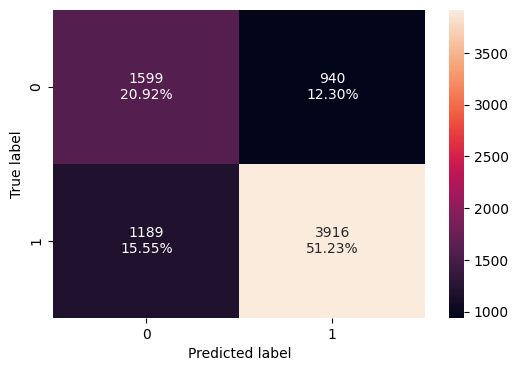

In [ ]:
#Calculating different metrics
dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

* The overfitting has practically dissapeared
* Recall, Precision and F1 Score have all of the increased significantly, so there is an improvement in the performance of the model

#### Random Forest Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.67,1:0.33},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(5,30,5)) + [None],
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(10,110,10)}


# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
#grid_obj = grid_obj.fit(X_train, y_train)



# set the conditions for the random search
grid_obj = RandomizedSearchCV(rf_tuned,
                 param_distributions=parameters,
                 n_iter=40,
                 cv=3,
                 scoring='f1_micro',
                 return_train_score=True,
                 random_state=42)

# perform the hyperparameter tuning with random search
grid_obj.fit(X_train, y_train)

# find the best hyperparameters
best_parameters = grid_obj.best_params_
best_score = grid_obj.best_score_

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
# perform the hyperparameter tuning with random search
rf_tuned.fit(X_train, y_train)
y_pred_rs = rf_tuned.predict(X_test)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.762615  0.792076   0.843027  0.816758
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.722658  0.763761   0.810098  0.786247


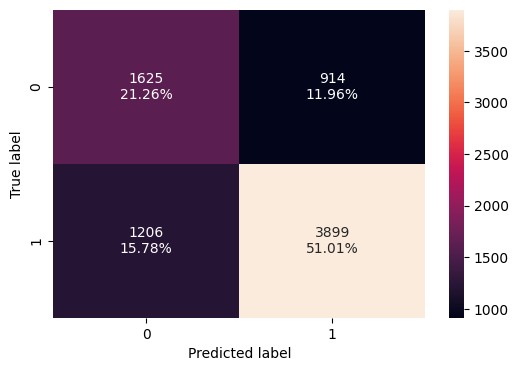

In [ ]:
#Calculating different metrics
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)

* The overfitting has reduced significantly, the recall has reduced a bit but the precision has inicreased
* F1 score has reduced a bit but the change is not significant. 
* There is an overall improvement since the model performance is good and is not overfitting as it was before.

#### Bagging Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.6, 0.7,0.8,0.9,1],
              'n_estimators' : [20,40,60,80,100],
             }

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
#grid_obj = grid_obj.fit(X_train, y_train)



# set the conditions for the random search
grid_obj = RandomizedSearchCV(bagging_estimator_tuned,
                 param_distributions=parameters,
                 n_iter=40,
                 cv=3,
                 scoring='f1_micro',
                 return_train_score=True,
                 random_state=42)

# perform the hyperparameter tuning with random search
grid_obj.fit(X_train, y_train)

# find the best hyperparameters
best_parameters = grid_obj.best_params_
best_score = grid_obj.best_score_

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
# perform the hyperparameter tuning with random search
bagging_estimator_tuned.fit(X_train, y_train)
y_pred_rs = bagging_estimator_tuned.predict(X_test)

   Accuracy    Recall  Precision        F1
0  0.994057  0.999496   0.991672  0.995569
   Accuracy    Recall  Precision        F1
0  0.729853  0.873262   0.758679  0.811948


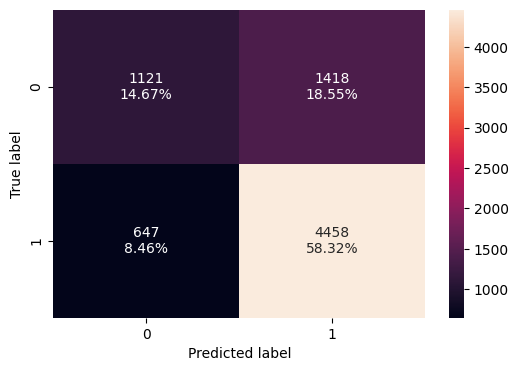

In [ ]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print(bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print(bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

* Recall has increased very significantly but Precision has a slight reduction. F1 Score has improved so model performance overall is doing better now.
* The model is still overfitting the training data although there was a slight reduction.

#### AdaBoost Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),
                      DecisionTreeClassifier(max_depth=3)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
#grid_obj = grid_obj.fit(X_train, y_train)



# set the conditions for the random search
grid_obj = RandomizedSearchCV(abc_tuned,
                 param_distributions=parameters,
                 n_iter=40,
                 cv=3,
                 scoring='f1_micro',
                 return_train_score=True,
                 random_state=42)

# perform the hyperparameter tuning with random search
grid_obj.fit(X_train, y_train)

# find the best hyperparameters
best_parameters = grid_obj.best_params_
best_score = grid_obj.best_score_

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
# perform the hyperparameter tuning with random search
abc_tuned.fit(X_train, y_train)
y_pred_rs = abc_tuned.predict(X_test)

   Accuracy    Recall  Precision        F1
0  0.757401  0.884748   0.781088  0.829693
   Accuracy    Recall  Precision       F1
0  0.742282  0.876787   0.769469  0.81963


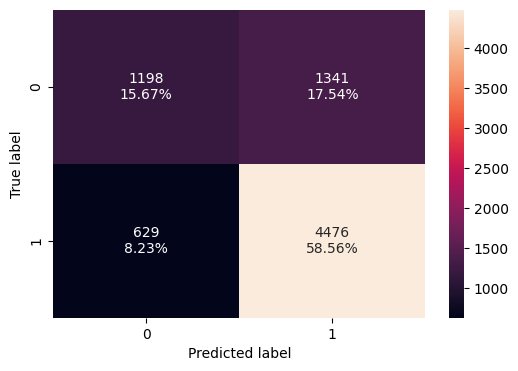

In [ ]:
#Calculating different metrics
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print(abc_tuned_model_train_perf)
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print(abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

* The performance of the model has slightly increased(not significantly) despite there was a slight reduction in recall. The model is NOT overfitting the training data and the accuracy has increased a bit
* In a few words we can say that the model hasn't really improved.

#### Gradient Boosting Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
#grid_obj = grid_obj.fit(X_train, y_train)



# set the conditions for the random search
grid_obj = RandomizedSearchCV(gbc_tuned,
                 param_distributions=parameters,
                 n_iter=40,
                 cv=3,
                 scoring='f1_micro',
                 return_train_score=True,
                 random_state=42)

# perform the hyperparameter tuning with random search
grid_obj.fit(X_train, y_train)

# find the best hyperparameters
best_parameters = grid_obj.best_params_
best_score = grid_obj.best_score_

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
# perform the hyperparameter tuning with random search
gbc_tuned.fit(X_train, y_train)
y_pred_rs = gbc_tuned.predict(X_test)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755999  0.878368   0.782823  0.827848
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745945  0.873653   0.774709  0.821212


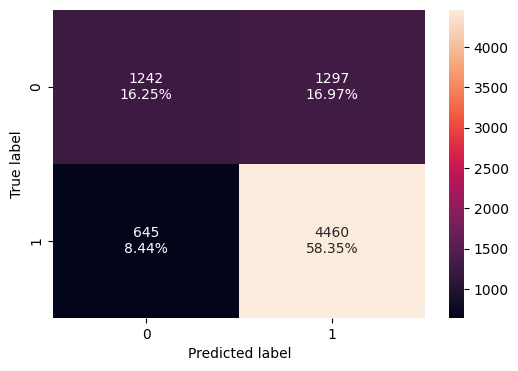

In [ ]:
#Calculating different metrics
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

* There is no any significant difference in the performance of the model after perform Hyperparameter tuning

#### XGBoost Classifier - Hyperparameter Tuning

In [ ]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
#scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
#grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
#grid_obj = grid_obj.fit(X_train, y_train)



# set the conditions for the random search
grid_obj = RandomizedSearchCV(xgb_tuned,
                 param_distributions=parameters,
                 n_iter=100,
                 cv=3,
                 scoring='f1_micro',
                 return_train_score=True,
                 random_state=42)

# perform the hyperparameter tuning with random search
grid_obj.fit(X_train, y_train)

# find the best hyperparameters
best_parameters = grid_obj.best_params_
best_score = grid_obj.best_score_

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
# perform the hyperparameter tuning with random search
xgb_tuned.fit(X_train, y_train)
y_pred_rs = xgb_tuned.predict(X_test)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.763904  0.884832   0.787818  0.833511
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.745029  0.873849   0.773673  0.820716


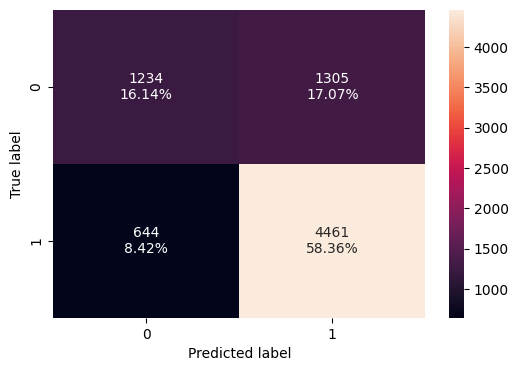

In [ ]:
#Calculating different metrics
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

* The model now is not overfitting the training data.
* Recall shows a slight reduction, whereas precision has a slight increase.
* There is a small improvement of the performance of the model in terms of F1 score.

## Model Performance Comparison and Conclusions

In [ ]:
# training performance comparison
models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.727181,1.0,0.762615,0.983516,0.994057,0.737105,0.757401,0.758298,0.755999,0.829670,0.763904,0.764129
Recall,1.0,0.766054,1.0,0.792076,0.984387,0.999496,0.889449,0.884748,0.883824,0.878368,0.924284,0.884832,0.880215
Precision,1.0,0.814458,1.0,0.843027,0.990875,0.991672,0.758591,0.781088,0.782476,0.782823,0.837529,0.787818,0.790442
F1,1.0,0.789515,1.0,0.816758,0.987620,0.995569,0.818825,0.829693,0.830068,0.827848,0.878771,0.833511,0.832916


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Estimator",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Estimator,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.656463,0.721481,0.720696,0.722658,0.698718,0.729853,0.732470,0.742282,0.746206,0.745945,0.732470,0.745029,0.747645
Recall,0.736729,0.767091,0.836239,0.763761,0.771988,0.873262,0.885406,0.876787,0.878159,0.873653,0.859158,0.873849,0.870127
Precision,0.745786,0.806425,0.766703,0.810098,0.775787,0.758679,0.755853,0.769469,0.772798,0.774709,0.767857,0.773673,0.778206
F1,0.741230,0.786266,0.799963,0.786247,0.773883,0.811948,0.815516,0.819630,0.822116,0.821212,0.810946,0.820716,0.821604


* There are several models that are overfitting in terms of accuracy and F1-score. The ones with **the worst scenarios** are Bagging Clasifier, Bagging estimator tuned, Decision tree, and Random Forest estimator. So we should refrain for now to use anyone of those models to perfor predictions.
* There are few models that have a very good performance and a very low overfit; we have Adaboost Classifier, Decision Tree Estimator(tuned), Gradient Boost Classifier and Gradient Boost Classifier Tuned
* The one with the best combination of performance in terms of F1 and difference of accuracy(trainig vs test) is minimal is Gradient Boost Classifier Tuned

### Feature importance of Gradient Boost Classifier Tuned

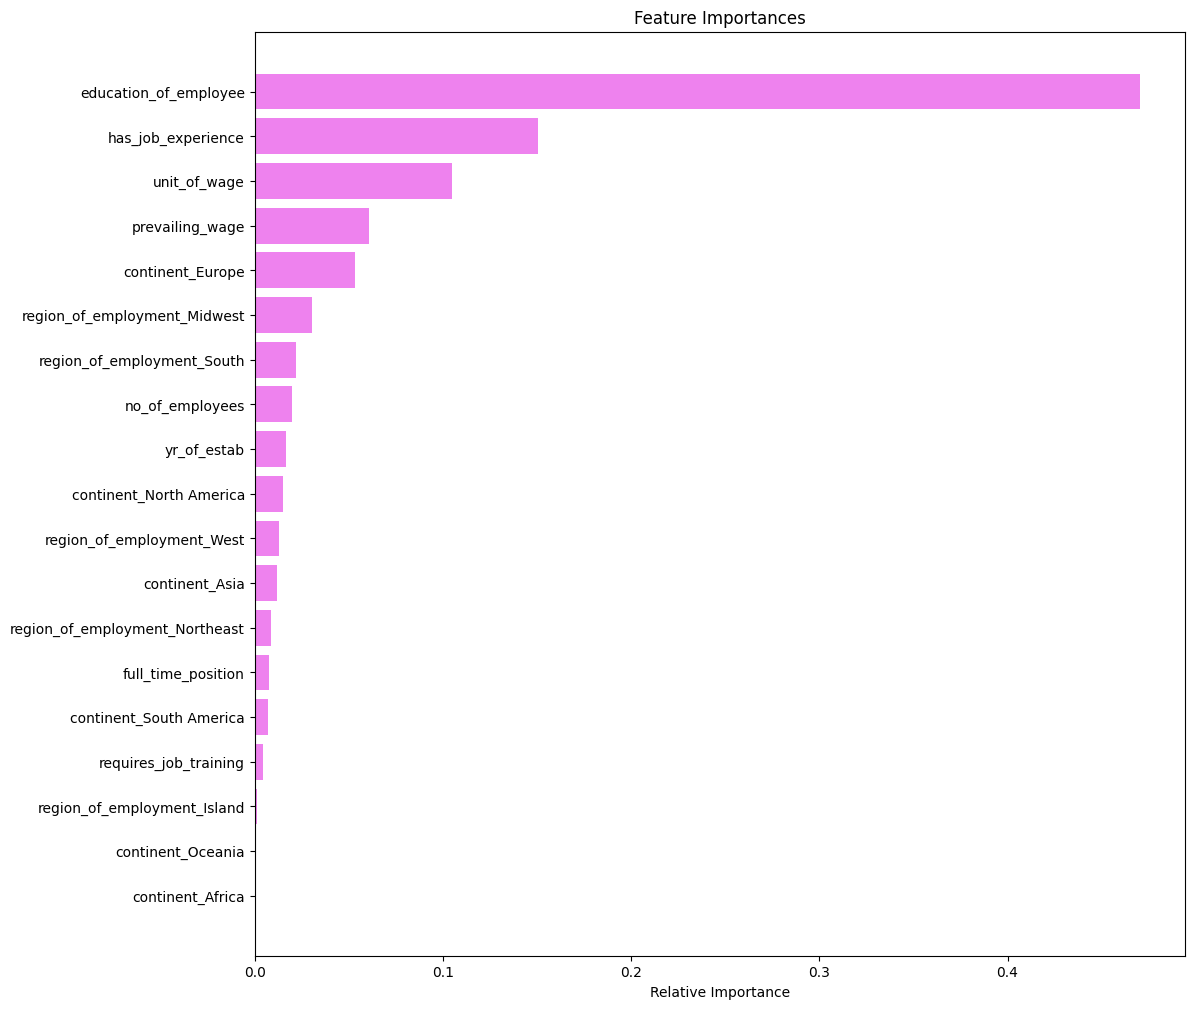

In [ ]:
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Education level, job experience and unit_of_wage are the three more important features to identify the best candidate to be Certified 

## Actionable Insights and Recommendations

- After performing all this analysis we can state that the right a candidates are prone to get Certified if: 
    - They have high education(bachelor, master or doctorate)
    - They have job experience
    - Position doesn't fall on unit_of_wage=Hour, since only 35% of such applications get certified.
- The pre-requisites to get into the selection process should be more strict regards the more important attributes of the applicants (education level, job experience). 87% of the applications have been done by Profesionals, nonetheless only 58% of the applicants have job experience. Is highly recommended to create policies to filter out cases that most likely will not pass.
- To have job experience is as per our analysis a factor that increases the chances of get a Certified visa. 75% of applications with job experienced were certified, whereas only 56% without job experience were certified. Roughly speaking we can state that having job experience provides an extra 19% chance of getting certified.
- Education level is the most important features when it comes to get a visa certification. The higher the level of education, the higher chances of getting certified. Doctorate, Master's, Bachelors and High School have this certified rates respectively 87%, 79%, 62% and 34%. As we can observe; having for someone having only high school would be quite hard to get certified as the oposite for someone with a Doctorate. For highschool, only 34% of the applicants were choosen.
- The current performance of the selected model "Gradient Boost Classifier Tuned" is 0.82 in terms of F1-score with an accuracy of 75%. We recomend using this model to identify potential candidates to be certified, and also the ones that would be rejected. This ML model will help OFLC to reduce the cost and time of the manual verifications and increase the efficiency of the process.
- It is also worth it to mention that the recomended model has a recall parameter of 0.87 and precision parameter of 0.77; with this we make sure that 8 out of 10 applicants that are meant to get Certified, **actually get Certified**; and that 8 out of 10 applicants that are meant not to get certified **get Denied**.